In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn

In [453]:
# Reading csv file
MSal_ds = pd.read_csv('MNC_salaries.csv')
print (MSal_ds)

              Name            Team  Number Position  Age     DOJ  Weight  \
0    Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1      Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2     John Holland  Boston Celtics      30       SG   27  06-May     205   
3      R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4    Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   
..             ...             ...     ...      ...  ...     ...     ...   
452     Trey Lyles       Utah Jazz      41       PF   20  06-Oct     234   
453   Shelvin Mack       Utah Jazz       8       PG   26  06-Mar     203   
454      Raul Neto       Utah Jazz      25       PG   24  06-Jan     179   
455   Tibor Pleiss       Utah Jazz      21        C   26  07-Mar     256   
456    Jeff Withey       Utah Jazz      24        C   26     7-0     231   

               College     Salary  
0                Texas  7730337.0  
1            Ma

In [454]:
# Changing it to dataframe
MSal_df = pd.DataFrame(MSal_ds)
MSal_df

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [455]:
# Checking columns
MSal_df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'DOJ', 'Weight', 'College',
       'Salary'],
      dtype='object')

In [456]:
# Datatypes
MSal_df.dtypes

Name         object
Team         object
Number        int64
Position     object
Age           int64
DOJ          object
Weight        int64
College      object
Salary      float64
dtype: object

In [457]:
# First few rows of dataset
MSal_df.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [458]:
# Value counts for different positions
MSal_df['Position'].value_counts()


SG    102
PF    100
PG     92
SF     85
C      78
Name: Position, dtype: int64

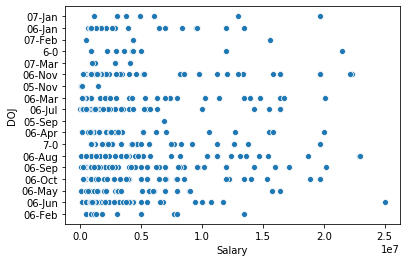

In [459]:
# Bivariate Analysis
sns.scatterplot(x=MSal_df['Salary'], y=MSal_df['DOJ'], data=MSal_df)

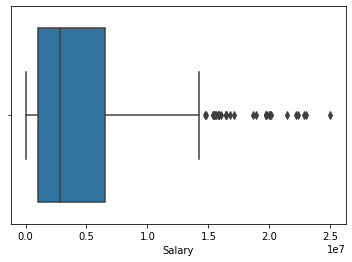

In [460]:
#Univariate Analysis for Salary
sns.boxplot(MSal_df['Salary'])
plt.show()

In [461]:
# Changing object data type
# Changing object to categorical type
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
arr = ['Team', 'Position', 'DOJ', 'College']
for val in arr:
    MSal_df[val] = MSal_df[val].astype(str)
    MSal_df[val] = le.fit_transform(MSal_df[val])
    

In [462]:
# Converted data types
MSal_df.dtypes

Name         object
Team          int32
Number        int64
Position      int32
Age           int64
DOJ           int32
Weight        int64
College       int32
Salary      float64
dtype: object

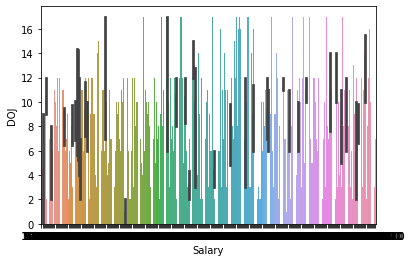

In [463]:
# Plotting bar graph for visualization: Bivariate Analysis
# DOJ vs Salary
sns.barplot(x='Salary', y='DOJ', data=MSal_df)
plt.show()

In [464]:
MSal_df.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,1,0,2,25,4,180,93,7730337.0
1,Jae Crowder,1,99,3,25,7,235,52,6796117.0
2,John Holland,1,30,4,27,9,205,8,NaN
3,R.J. Hunter,1,28,4,22,9,185,33,1148640.0
4,Jonas Jerebko,1,8,1,29,11,231,118,5000000.0


In [465]:
# Drppoing unneccessary columns
MSal_df.drop(['Name', 'Weight'], axis = 1, inplace=True)
MSal_df

,Team,Number,Position,Age,DOJ,College,Salary
0,1,0,2,25,4,93,7730337.0
1,1,99,3,25,7,52,6796117.0
2,1,30,4,27,9,8,NaN
3,1,28,4,22,9,33,1148640.0
4,1,8,1,29,11,118,5000000.0
...,...,...,...,...,...,...,...
452,28,41,1,20,11,45,2239800.0
453,28,8,2,26,8,11,2433333.0
454,28,25,2,24,5,118,900000.0
455,28,21,0,26,15,118,2900000.0


In [466]:
# Checking the sums of null
MSal_df.isnull().sum()

Team         0
Number       0
Position     0
Age          0
DOJ          0
College      0
Salary      11
dtype: int64

In [467]:
# changing null salary to mean of salary
MSal_df['Salary'] = MSal_df['Salary'].replace(np.NaN, MSal_df['Salary'].mean())

In [468]:
#Again checking sum of null
MSal_df.isnull().sum()

Team        0
Number      0
Position    0
Age         0
DOJ         0
College     0
Salary      0
dtype: int64

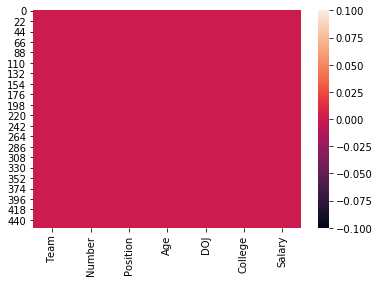

In [469]:
# Heatmap for null values
sns.heatmap(MSal_df.isnull())

In [470]:
# Corelation between different features
MSal_df.corr()

,Team,Number,Position,Age,DOJ,College,Salary
Team,1.000000,-0.054748,-0.009638,-0.042344,0.004796,0.031684,-0.039337
Number,-0.054748,1.000000,-0.177229,0.028724,0.102402,0.053274,-0.111436
Position,-0.009638,-0.177229,1.000000,-0.062992,-0.547383,-0.092516,-0.094108
Age,-0.042344,0.028724,-0.062992,1.000000,0.044540,0.051550,0.210627
DOJ,0.004796,0.102402,-0.547383,0.044540,1.000000,0.150479,0.039222
College,0.031684,0.053274,-0.092516,0.051550,0.150479,1.000000,0.050300
Salary,-0.039337,-0.111436,-0.094108,0.210627,0.039222,0.050300,1.000000


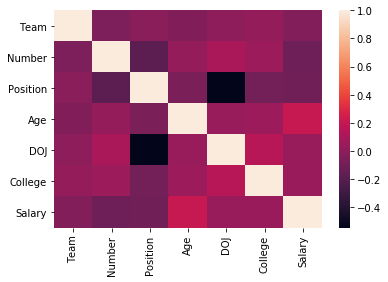

In [471]:
# Heatmap for correlation
sns.heatmap(MSal_df.corr())

In [472]:
# Checking skewness
MSal_df.skew()

Team       -0.007368
Number      1.668386
Position   -0.014795
Age         0.626349
DOJ         0.192022
College    -0.127550
Salary      1.595511
dtype: float64

In [473]:
# If skewness present: Remove skewness 
for col in MSal_df.columns:
    if MSal_df.skew().loc[col] > 0.55:
        MSal_df[col] = np.log1p(MSal_df[col])

In [474]:
# Again checking skewness
MSal_df.skew()

Team       -0.007368
Number     -0.638011
Position   -0.014795
Age         0.284946
DOJ         0.192022
College    -0.127550
Salary     -0.450091
dtype: float64

In [475]:
# Z score chcek
from scipy.stats import zscore
z_score = abs(zscore(MSal_df))
print (MSal_df.shape)

MSal_df_final = MSal_df.loc[(z_score < 3).all(axis=1)]
print (MSal_df_final.shape)

(457, 7)
(454, 7)


In [476]:
# Standard scaler used to scale the data
sc = StandardScaler()
MSal_df = sc.fit_transform(MSal_df)
MSal_df

array([[-1.57366745, -2.45903592, -0.05138118, ..., -1.09357292,
         0.6475773 ,  0.88822719],
       [-1.57366745,  2.05162966,  0.66017031, ..., -0.36611612,
        -0.44416787,  0.78062159],
       [-1.57366745,  0.90448101,  1.37172179, ...,  0.11885509,
        -1.61579683,  0.49750563],
       ...,
       [ 1.56882854,  0.73219987, -0.05138118, ..., -0.85108732,
         1.31327557, -0.90839778],
       [ 1.56882854,  0.56857397, -1.47448415, ...,  1.5737687 ,
         1.31327557,  0.06912658],
       [ 1.56882854,  0.69378402, -1.47448415, ...,  2.05873991,
        -0.68381925, -0.86562683]])

In [477]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model

In [478]:
# Converting into input and target variable
x = MSal_df[:, 0:-1]
y = MSal_df[:,-1]

In [479]:
x.shape

(457, 6)

In [480]:
y.shape

(457,)

In [481]:
# Subroutine to get the best random state with max r2_score
max_r2_score = 0
for r_state in range (42, 100):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)
    
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test, y_pred)
    
    
    print ("\nr2 score corresponding to state: ", r_state, " is: ", r2_scr)
    if (r2_scr > max_r2_score):
        max_r2_score = r2_scr
        final_r_state = r_state
print ("\nMax r2 score corresponding to ", final_r_state, " is: ", max_r2_score)



r2 score corresponding to state:  42  is:  -0.07256717200080964

r2 score corresponding to state:  43  is:  -0.1414309179882558

r2 score corresponding to state:  44  is:  0.03686844229409436

r2 score corresponding to state:  45  is:  -0.008219849608663843

r2 score corresponding to state:  46  is:  0.04404019907542056

r2 score corresponding to state:  47  is:  0.025242750205158093

r2 score corresponding to state:  48  is:  -0.05858831591456681

r2 score corresponding to state:  49  is:  0.05707446948018946

r2 score corresponding to state:  50  is:  0.041816524575228886

r2 score corresponding to state:  51  is:  -0.0037609351876044528

r2 score corresponding to state:  52  is:  0.06092162923765754

r2 score corresponding to state:  53  is:  0.1029241910978499

r2 score corresponding to state:  54  is:  -0.06169308538910512

r2 score corresponding to state:  55  is:  0.055771706090067874

r2 score corresponding to state:  56  is:  0.05675826698179687

r2 score corresponding to sta

In [482]:
# Further chceking with cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), x, y, cv=10, scoring="r2").mean()

0.021921763492361045

In [483]:
# Applying the algorithm with best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=86, test_size=.20)
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [484]:
# Evaluate r2_score and RMSE
print("\n r2 score is: ", r2_score(y_test, y_pred))
print("\n RMSE is: ", np.sqrt(mean_squared_error(y_test, y_pred)))


 r2 score is:  0.11333013857121255

 RMSE is:  0.9176745301703056


In [485]:
# Regularization: Using Lasso Regression
# GridSerachCV : to use the best parameters and best model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param = {'alpha': [0.1, 0.001, 0.0001, 1.0]}

grid = GridSearchCV(estimator = Lasso(), param_grid = param, scoring='r2')
d_mod = grid.fit(x,y)
print ("\n Best Params ", grid.best_params_)
print ("\n Best Score ", grid.best_score_)



 Best Params  {'alpha': 0.001}

 Best Score  0.02376931172341441


In [486]:
# Using lasso for Regularization, to remove variance and biasedness

ls = Lasso(alpha = 0.001, normalize=True)

print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

ls.fit(x_train, y_train)
print ("\n Predicted value: ", ls.predict(x_test))
ls_pred = ls.predict(x_test)

print ("\n Score: ", ls.score(x_train, y_train))
print ("\n Coef: ", ls.coef_)
print ("\n Intercept: ", ls.intercept_)

#plt.bar (x, ls.coef_)
#plt.show()
ls.coef_.shape


(365, 6)
(365,)
(92, 6)
(92,)

 Predicted value:  [-0.22090273 -0.38176718  0.08171899 -0.12872666 -0.17926592  0.21178928
  0.14107121 -0.13375496 -0.28803866  0.00659014  0.41556377  0.15874892
  0.07679977 -0.03762147 -0.21048892 -0.15206226 -0.1896878  -0.26773754
  0.30499958 -0.38200088 -0.03644115  0.28076786 -0.51838306 -0.20695753
 -0.11195542  0.27501006 -0.01287882 -0.22354297  0.15258871 -0.25810528
  0.09199415 -0.17211126  0.00347947  0.00394273  0.05904337 -0.25270924
 -0.1253344   0.16919541 -0.0865596  -0.34686058 -0.08972108  0.06162301
  0.02069129  0.14153135 -0.23301599  0.06896805  0.18185059  0.0702401
 -0.12295441 -0.23926596 -0.26092267  0.03274701 -0.34933442 -0.05598219
  0.18775792  0.02848999  0.23285941  0.14621382 -0.41729727  0.06445671
 -0.29102466 -0.09623244 -0.1154587  -0.27413361  0.30766982 -0.12397768
  0.41615072  0.13233019  0.16729983  0.2464276  -0.13471267 -0.29100704
 -0.41151602  0.2221309  -0.30053751 -0.41953654  0.02251247 -0.22728697
  

(6,)

In [488]:
import joblib
joblib.dump(lr, 'Prj_Sal.pkl')
clf = joblib.load('Prj_Sal.pkl')
clf.predict(x_test)

array([-0.25208589, -0.43572213,  0.05839215, -0.17033891, -0.19816747,
        0.25179426,  0.14709347, -0.12957301, -0.3541313 ,  0.05707272,
        0.44587863,  0.16115889,  0.04894194, -0.01467685, -0.22445102,
       -0.1974353 , -0.16997612, -0.34606489,  0.43371851, -0.41366688,
       -0.03059846,  0.36005868, -0.62933802, -0.25401722, -0.13036668,
        0.34871881, -0.03406701, -0.29523666,  0.19641884, -0.32568704,
        0.05248471, -0.21675665, -0.00146218,  0.02601189,  0.05187947,
       -0.29567323, -0.13506723,  0.17466876, -0.12760382, -0.43334654,
       -0.13816958,  0.09347576,  0.00862949,  0.16465329, -0.21387599,
        0.09760411,  0.18059433,  0.07925625, -0.13129168, -0.29692351,
       -0.26913538,  0.08221847, -0.4263985 , -0.10144309,  0.24519148,
        0.05411089,  0.22963915,  0.0957321 , -0.49353823,  0.12430971,
       -0.33072265, -0.06582237, -0.17346151, -0.32351675,  0.35876159,
       -0.17752278,  0.44856666,  0.14933847,  0.22135317,  0.26

array([-0.25208589, -0.43572213,  0.05839215, -0.17033891, -0.19816747,
        0.25179426,  0.14709347, -0.12957301, -0.3541313 ,  0.05707272,
        0.44587863,  0.16115889,  0.04894194, -0.01467685, -0.22445102,
       -0.1974353 , -0.16997612, -0.34606489,  0.43371851, -0.41366688,
       -0.03059846,  0.36005868, -0.62933802, -0.25401722, -0.13036668,
        0.34871881, -0.03406701, -0.29523666,  0.19641884, -0.32568704,
        0.05248471, -0.21675665, -0.00146218,  0.02601189,  0.05187947,
       -0.29567323, -0.13506723,  0.17466876, -0.12760382, -0.43334654,
       -0.13816958,  0.09347576,  0.00862949,  0.16465329, -0.21387599,
        0.09760411,  0.18059433,  0.07925625, -0.13129168, -0.29692351,
       -0.26913538,  0.08221847, -0.4263985 , -0.10144309,  0.24519148,
        0.05411089,  0.22963915,  0.0957321 , -0.49353823,  0.12430971,
       -0.33072265, -0.06582237, -0.17346151, -0.32351675,  0.35876159,
       -0.17752278,  0.44856666,  0.14933847,  0.22135317,  0.26